In [143]:
#Muhammad Afnan Akram    Email: i190588@nu.edu.pk
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
df=pd.read_csv("zameen.csv")
df5=df.copy()
df

,property_type,location,city,latitude,longitude,baths,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,Squarefeet,price
0,Flat,G-10,Islamabad,33.679890,73.012640,2,2,43557,NaN,NaN,Marla,4.0,0-5 Marla,1089.0040,10000000
1,Flat,E-11,Islamabad,33.700993,72.971492,3,3,43560,NaN,NaN,Marla,5.6,5-10 Marla,1524.6056,6900000
2,House,G-15,Islamabad,33.631486,72.926559,6,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla,2178.0080,16500000
3,House,Bani Gala,Islamabad,33.707573,73.151199,4,4,43589,NaN,NaN,Kanal,2.0,1-5 Kanal,10890.0000,43500000
4,House,DHA Defence,Islamabad,33.492591,73.301339,3,3,43745,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla,2178.0080,7000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120650,House,Gadap Town,Karachi,25.029909,67.137192,0,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla,2613.6096,26500000
120651,House,Gadap Town,Karachi,25.017951,67.136393,0,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla,2178.0080,12500000
120652,House,Gadap Town,Karachi,25.015384,67.116330,0,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla,2613.6096,27000000
120653,House,Gadap Town,Karachi,25.013265,67.120818,0,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla,2123.5578,11000000


# Feature Selection
We don,t need any FS algorithm. we can drop the features that are not requird for our model.

In [144]:
df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120655 entries, 0 to 120654
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  120655 non-null  object 
 1   location       120655 non-null  object 
 2   city           120655 non-null  object 
 3   latitude       120655 non-null  float64
 4   longitude      120655 non-null  float64
 5   baths          120655 non-null  int64  
 6   bedrooms       120655 non-null  int64  
 7   date_added     120655 non-null  object 
 8   agency         89192 non-null   object 
 9   agent          89191 non-null   object 
 10  Area Type      120655 non-null  object 
 11  Area Size      120655 non-null  float64
 12  Area Category  120655 non-null  object 
 13  Squarefeet     120655 non-null  float64
 14  price          120655 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 13.8+ MB
None


In [145]:

df=df.drop(['property_type','latitude','longitude','date_added','agency','agent','Area Type','Area Size','Area Category'], axis = 1)
df

,location,city,baths,bedrooms,Squarefeet,price
0,G-10,Islamabad,2,2,1089.0040,10000000
1,E-11,Islamabad,3,3,1524.6056,6900000
2,G-15,Islamabad,6,5,2178.0080,16500000
3,Bani Gala,Islamabad,4,4,10890.0000,43500000
4,DHA Defence,Islamabad,3,3,2178.0080,7000000
...,...,...,...,...,...,...
120650,Gadap Town,Karachi,0,6,2613.6096,26500000
120651,Gadap Town,Karachi,0,3,2178.0080,12500000
120652,Gadap Town,Karachi,0,6,2613.6096,27000000
120653,Gadap Town,Karachi,0,3,2123.5578,11000000


# Data Selection
From the data of all cities, we selected 'Islamabad' data to train our model

In [146]:
print(df["city"].unique())
df.shape


['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']


(120655, 6)

In [147]:
df = df[df["city"] == "Islamabad"] 
df.head(50)

,location,city,baths,bedrooms,Squarefeet,price
0,G-10,Islamabad,2,2,1089.0040,10000000
1,E-11,Islamabad,3,3,1524.6056,6900000
2,G-15,Islamabad,6,5,2178.0080,16500000
3,Bani Gala,Islamabad,4,4,10890.0000,43500000
4,DHA Defence,Islamabad,3,3,2178.0080,7000000
5,Ghauri Town,Islamabad,8,8,8712.0000,34500000
6,Korang Town,Islamabad,8,8,5445.0000,27000000
7,E-11,Islamabad,2,2,1687.9562,7800000
8,DHA Defence,Islamabad,7,7,5445.0000,50000000
9,F-11,Islamabad,5,5,5445.0000,40000000


# Checking Null values

In [148]:

df.isna().sum()

location      0
city          0
baths         0
bedrooms      0
Squarefeet    0
price         0
dtype: int64

In [149]:
df.describe()

,baths,bedrooms,Squarefeet,price
count,16106.000000,16106.000000,1.610600e+04,1.610600e+04
mean,3.404321,3.604185,4.109801e+03,3.097514e+07
std,2.623599,2.345501,2.413004e+04,4.986600e+07
min,0.000000,0.000000,0.000000e+00,1.000000e+00
25%,1.000000,2.000000,1.361255e+03,7.500000e+06
50%,3.000000,4.000000,2.123558e+03,1.600000e+07
75%,6.000000,5.000000,3.620938e+03,3.500000e+07
max,14.000000,16.000000,1.633500e+06,9.000000e+08



# Outliers detection
Here we check the outliers in bedrooms and baths column. and remove the outliers

In [150]:

df['bedrooms'].unique()

array([ 2,  3,  5,  4,  8,  7,  0,  1,  6, 10,  9, 11, 12, 16, 15],
      dtype=int64)

C:\Users\afnan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

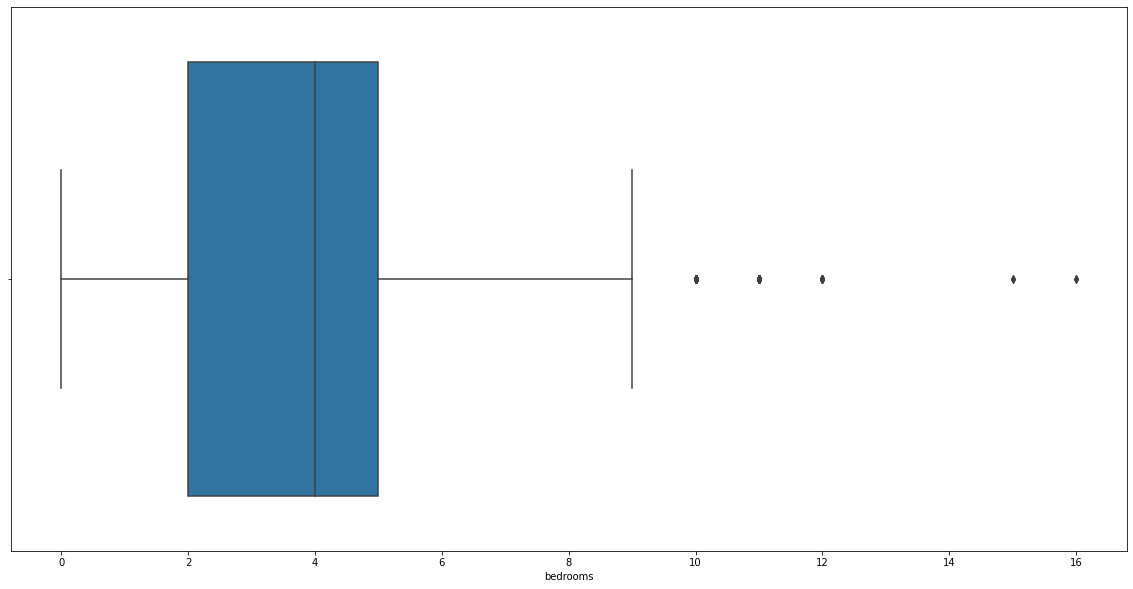

In [151]:
sns.boxplot(df.bedrooms)

C:\Users\afnan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

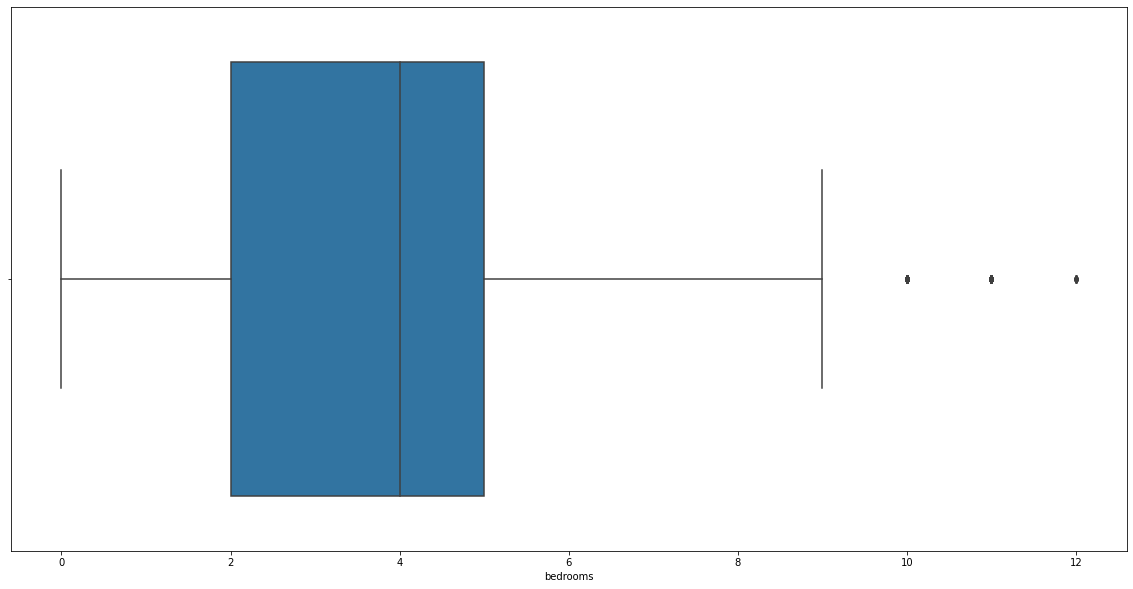

In [152]:
df = df.drop(df[df.bedrooms > 13].index)
sns.boxplot(df.bedrooms)

In [153]:
df['baths'].unique()

array([ 2,  3,  6,  4,  8,  7,  5,  0,  1, 10,  9, 11, 12, 14],
      dtype=int64)

C:\Users\afnan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='baths'>

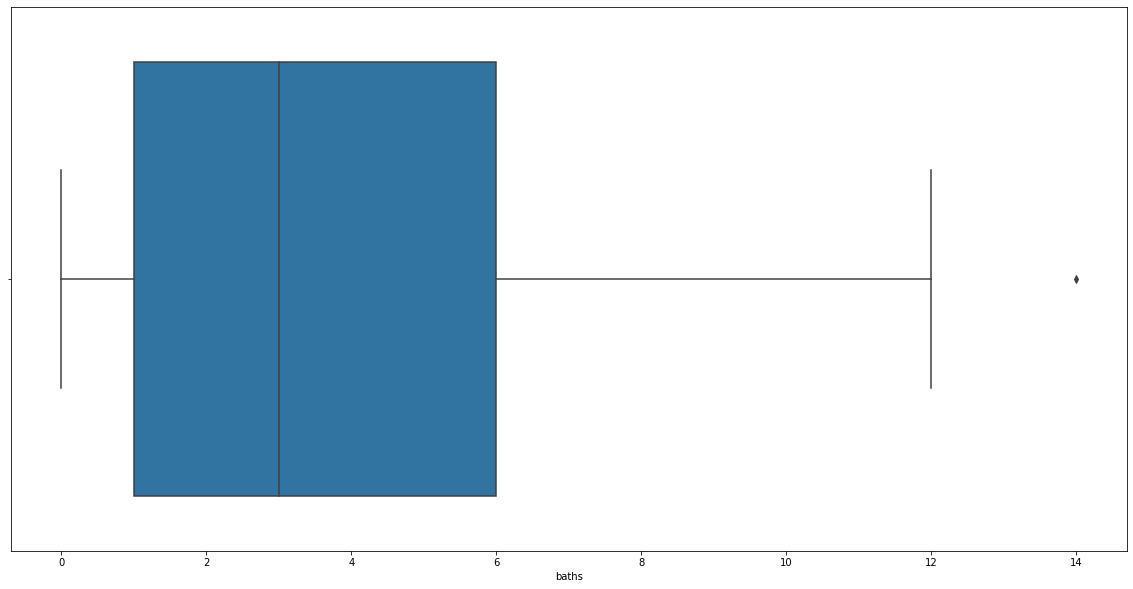

In [154]:
sns.boxplot(df.baths)

C:\Users\afnan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='baths'>

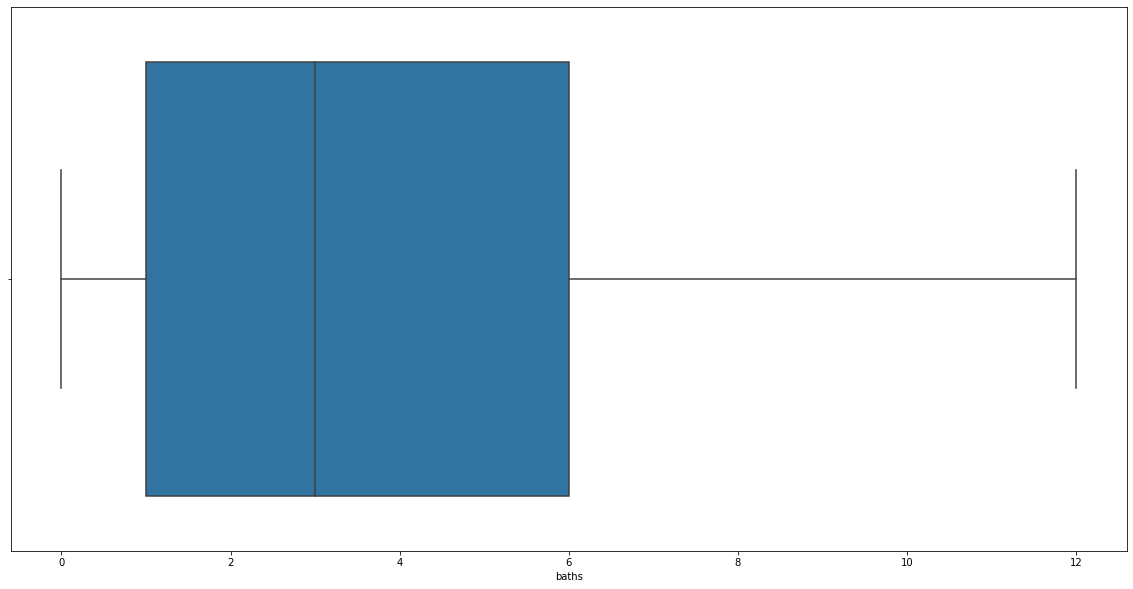

In [155]:

df = df.drop(df[df.baths > 12].index)
sns.boxplot(df.baths)

# Check faulty data
Now we check the data that is written by mistake.
E.g: When bedrooms are greater then 3 then baths must be not zero
If we divide the Square feet area of a house with no. of bedrooms it must be greater then 300sqm

In [156]:
df = df.drop(df[(df['baths']==0) & (df['bedrooms'] > 3)].index)
df

,location,city,baths,bedrooms,Squarefeet,price
0,G-10,Islamabad,2,2,1089.0040,10000000
1,E-11,Islamabad,3,3,1524.6056,6900000
2,G-15,Islamabad,6,5,2178.0080,16500000
3,Bani Gala,Islamabad,4,4,10890.0000,43500000
4,DHA Defence,Islamabad,3,3,2178.0080,7000000
...,...,...,...,...,...,...
120556,G-15,Islamabad,4,4,4356.0160,20000000
120557,D-12,Islamabad,6,6,3865.9642,100000
120558,G-11,Islamabad,2,3,1932.9821,32500000
120559,G-15,Islamabad,1,1,762.3028,5000000


In [157]:
df.drop(df[df['Squarefeet'] / df['bedrooms'] < 300].index, inplace = True)
df

,location,city,baths,bedrooms,Squarefeet,price
0,G-10,Islamabad,2,2,1089.0040,10000000
1,E-11,Islamabad,3,3,1524.6056,6900000
2,G-15,Islamabad,6,5,2178.0080,16500000
3,Bani Gala,Islamabad,4,4,10890.0000,43500000
4,DHA Defence,Islamabad,3,3,2178.0080,7000000
...,...,...,...,...,...,...
120556,G-15,Islamabad,4,4,4356.0160,20000000
120557,D-12,Islamabad,6,6,3865.9642,100000
120558,G-11,Islamabad,2,3,1932.9821,32500000
120559,G-15,Islamabad,1,1,762.3028,5000000


# Check Location
Now check the locations and delete the locations with less then 100 records

In [158]:

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head()

location
DHA Defence    1910
Bahria Town    1060
G-13            689
E-11            671
G-11            597
Name: location, dtype: int64

In [159]:
len(df['location'].unique())

192

In [160]:
locations_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x:'others' if x in locations_less_than_10 else x)

In [161]:
len(df['location'].unique())

89

# Check S.D in Squarefeet and reduce it

In [162]:
df['Squarefeet'].describe()

count    1.419200e+04
mean     4.282557e+03
std      2.555848e+04
min      0.000000e+00
25%      1.361255e+03
50%      2.178008e+03
75%      3.811514e+03
max      1.633500e+06
Name: Squarefeet, dtype: float64

In [163]:
  def Squarefeet_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf['Squarefeet'])
        std = np.std(subdf['Squarefeet'])
        reduced_df = subdf[(subdf['Squarefeet'] > (m-std)) & (subdf['Squarefeet'] <= (m+std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [164]:
df = Squarefeet_outliers(df)
df.shape

df['Squarefeet'].describe()

count     11831.000000
mean       2920.053724
std        6332.235577
min           0.000000
25%        1361.255000
50%        1905.757000
75%        2722.510000
max      217800.000000
Name: Squarefeet, dtype: float64

# Compare price of 2 and 3 bedroom houses


In [165]:

def draw_plot(df5, location):
    bedroom_2 = df5[(df['location'] == location) & (df5['bedrooms'] == 2)]
    bedroom_3 = df5[(df['location'] == location) & (df5['bedrooms'] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bedroom_2['Squarefeet'], bedroom_2['price']/100000, color='blue', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['Squarefeet'], bedroom_3['price']/100000, marker='+', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

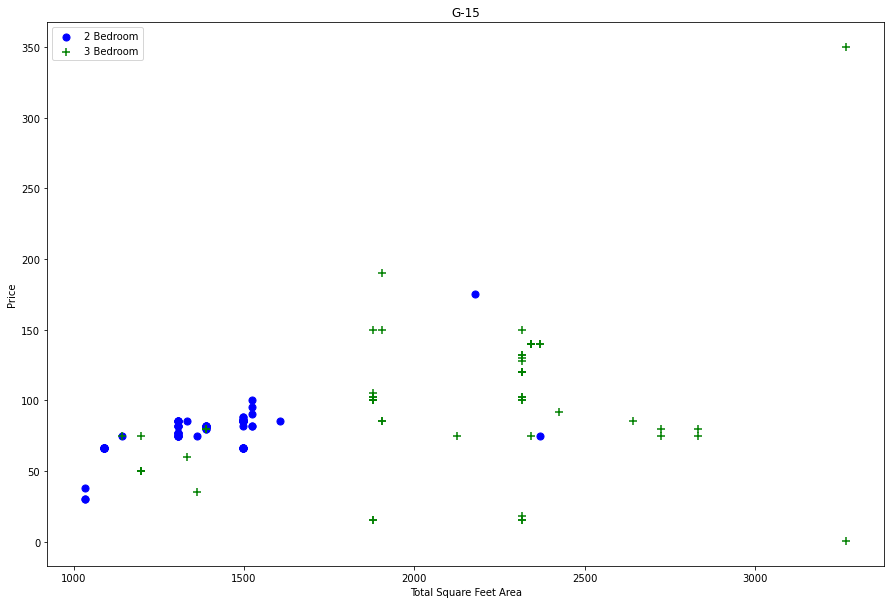

In [166]:

draw_plot(df, "G-15")


# 
We noticed that their are some 3 bedroom houses with price less then 2 bedroom houses, So we have to remove these outliers.

In [167]:

def Price_Outliers(df):
    data_to_drop = np.array([])
    for location, location_df in df.groupby("location"):
        b_1 = {}
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            b_1[bedroom] = {
                'mean' : np.mean(bedroom_df["Squarefeet"]),
                'std' : np.std(bedroom_df["Squarefeet"]),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            stats = b_1.get(bedroom - 1)
            if stats and stats['count']>5:
                data_to_drop = np.append(data_to_drop, bedroom_df[bedroom_df['Squarefeet'] < (stats['mean'])].index.values)
    return df.drop(data_to_drop, axis="index") 

In [168]:
df = Price_Outliers(df)
df



,location,city,baths,bedrooms,Squarefeet,price
0,Ali Pur,Islamabad,2,3,1361.2550,3800000
1,Ali Pur,Islamabad,2,2,1143.4542,5300000
2,Ali Pur,Islamabad,0,2,1089.0040,3600000
3,Ali Pur,Islamabad,3,3,1225.1295,4200000
4,Ali Pur,Islamabad,2,3,1633.5060,5490000
...,...,...,...,...,...,...
11825,others,Islamabad,5,5,2178.0080,20000000
11826,others,Islamabad,2,2,1361.2550,3700000
11827,others,Islamabad,0,0,10890.0000,180000000
11828,others,Islamabad,5,4,1905.7570,13000000


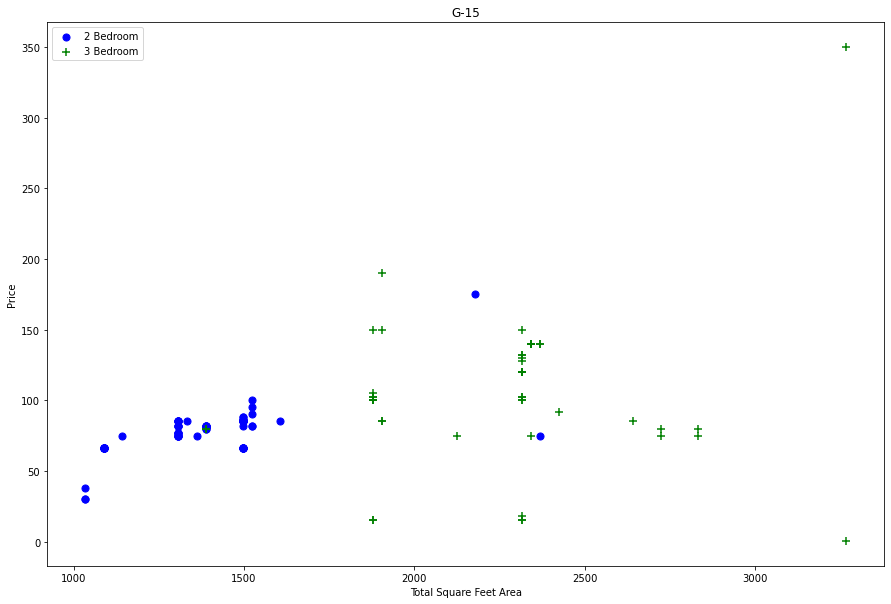

In [169]:
draw_plot(df, "G-15")

In [170]:
df = df.drop(df[df['baths'] > (df['bedrooms'] + 2)].index)
df.head(50)


,location,city,baths,bedrooms,Squarefeet,price
0,Ali Pur,Islamabad,2,3,1361.2550,3800000
1,Ali Pur,Islamabad,2,2,1143.4542,5300000
2,Ali Pur,Islamabad,0,2,1089.0040,3600000
3,Ali Pur,Islamabad,3,3,1225.1295,4200000
4,Ali Pur,Islamabad,2,3,1633.5060,5490000
5,Ali Pur,Islamabad,2,2,1089.0040,4250000
6,Ali Pur,Islamabad,2,2,1361.2550,5000000
7,Ali Pur,Islamabad,3,3,1524.6056,4800000
8,Ali Pur,Islamabad,0,0,680.6275,2700000
9,Ali Pur,Islamabad,3,3,2178.0080,8000000




# Make Dummy Variable
Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. So, we make for locations.

In [171]:
new = pd.get_dummies(df['location'])
new.head()

,Ali Pur,Alipur Farash,Arsalan Town,B-17,Bahria Town,Bani Gala,Bhara kahu,Blue Area,Burma Town,C-18,...,Simly Dam Road,Soan Garden,Swan Garden,Taramrri,Tarlai,Tarnol,Thanda Pani,The Springs,Zaraj Housing Scheme,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
df = pd.concat([df, new], axis="columns")
df = df.drop("city", axis=1)
df = df.drop("location", axis=1)
df.head()


,baths,bedrooms,Squarefeet,price,Ali Pur,Alipur Farash,Arsalan Town,B-17,Bahria Town,Bani Gala,...,Simly Dam Road,Soan Garden,Swan Garden,Taramrri,Tarlai,Tarnol,Thanda Pani,The Springs,Zaraj Housing Scheme,others
0,2,3,1361.2550,3800000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1143.4542,5300000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1089.0040,3600000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1225.1295,4200000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,1633.5060,5490000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Select X and Y

In [173]:

X = df.drop('price', axis=1) # Features
X.head()

,baths,bedrooms,Squarefeet,Ali Pur,Alipur Farash,Arsalan Town,B-17,Bahria Town,Bani Gala,Bhara kahu,...,Simly Dam Road,Soan Garden,Swan Garden,Taramrri,Tarlai,Tarnol,Thanda Pani,The Springs,Zaraj Housing Scheme,others
0,2,3,1361.2550,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1143.4542,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1089.0040,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1225.1295,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,1633.5060,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
y = df['price'] # Predictor or predicted_variable
y.head()

0    3800000
1    5300000
2    3600000
3    4200000
4    5490000
Name: price, dtype: int64

# Convert your model into test and train

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Linear Regression

In [176]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7774837673527024

# Decision Tree

In [177]:
DT=DecisionTreeRegressor(criterion='friedman_mse', random_state=1,
                      splitter='random')

DT.fit(X_train, y_train)
DT.score(X_test, y_test)

0.8743522940423314

# KNR

In [178]:
from sklearn.neighbors import KNeighborsRegressor
KN=KNeighborsRegressor()
KN.fit(X_train, y_train)
KN.score(X_test, y_test)

0.8260096935414245

# Random Forest 

In [179]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  
regressor.score(X_test, y_test)

0.9041965993437105

# Function to predict price with Decision Tree 

In [180]:
def predict_price_with_DT(location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = bedrooms
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1
    return DT.predict([x])[0] / 100000

In [190]:
                                      #(location,area in sqrf,bedrooms,baths)
print(str(int(predict_price_with_DT('B-17',2200, 4, 6))) + " Lacs")

139 Lacs


#  Function to predict price with Random Forest

In [182]:
def predict_price_with_REG(location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = bedrooms
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1
    return regressor.predict([x])[0] / 100000

In [189]:


#(location,area in sqrf,bedrooms,baths)
print(str(int(predict_price_with_REG('B-17',2200, 4, 6))) + " Lacs")

139 Lacs


In [184]:
def predict_price_with_LR(location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = bedrooms
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1
    return LR.predict([x])[0] / 100000

In [191]:
 #(location,area in sqrf,bedrooms,baths)
print(str(int(predict_price_with_LR('B-17',2200, 4, 6))) + " Lacs")

173 Lacs


In [186]:
def predict_price_with_KNN(location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = bedrooms
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1
    return KN.predict([x])[0] / 100000

In [192]:
#(location,area in sqrf,bedrooms,baths)
print(str(int(predict_price_with_KNN('B-17',2200, 4, 6))) + " Lacs")

137 Lacs
